In [13]:
import pandas as pd

In [14]:
df_declaracao_servico = pd.read_csv('../Datasets/iss_declaracao_anonimizado.csv', sep=';')
df_declaracao_servico

,row,id_empresa,competencia,tipo,imposto
0,1,1,201106,Prestado,"127,24"
1,2,1,201907,Prestado,"587,1348"
2,3,1,201112,Prestado,"160,62"
3,4,1,201704,Prestado,"312,94"
4,5,1,202304,Prestado,"122,54"
...,...,...,...,...,...
281430,281431,6365,202305,Prestado,90
281431,281432,6366,202304,Prestado,"135,96"
281432,281433,6367,202305,Prestado,260
281433,281434,6368,202305,Tomado,20


In [15]:
df_declaracao_servico['imposto'] = df_declaracao_servico['imposto'].str.replace(',', '.').astype(float).round(2)
df_declaracao_servico

,row,id_empresa,competencia,tipo,imposto
0,1,1,201106,Prestado,127.24
1,2,1,201907,Prestado,587.13
2,3,1,201112,Prestado,160.62
3,4,1,201704,Prestado,312.94
4,5,1,202304,Prestado,122.54
...,...,...,...,...,...
281430,281431,6365,202305,Prestado,90.00
281431,281432,6366,202304,Prestado,135.96
281432,281433,6367,202305,Prestado,260.00
281433,281434,6368,202305,Tomado,20.00


In [16]:
df_declaracao_servico['competencia'] = df_declaracao_servico['competencia'].astype(str) + '01'
df_declaracao_servico

,row,id_empresa,competencia,tipo,imposto
0,1,1,20110601,Prestado,127.24
1,2,1,20190701,Prestado,587.13
2,3,1,20111201,Prestado,160.62
3,4,1,20170401,Prestado,312.94
4,5,1,20230401,Prestado,122.54
...,...,...,...,...,...
281430,281431,6365,20230501,Prestado,90.00
281431,281432,6366,20230401,Prestado,135.96
281432,281433,6367,20230501,Prestado,260.00
281433,281434,6368,20230501,Tomado,20.00


In [17]:
df_declaracao_servico['competencia'] = pd.to_datetime(df_declaracao_servico['competencia'], format='%Y%m%d')
df_declaracao_servico

,row,id_empresa,competencia,tipo,imposto
0,1,1,2011-06-01,Prestado,127.24
1,2,1,2019-07-01,Prestado,587.13
2,3,1,2011-12-01,Prestado,160.62
3,4,1,2017-04-01,Prestado,312.94
4,5,1,2023-04-01,Prestado,122.54
...,...,...,...,...,...
281430,281431,6365,2023-05-01,Prestado,90.00
281431,281432,6366,2023-04-01,Prestado,135.96
281432,281433,6367,2023-05-01,Prestado,260.00
281433,281434,6368,2023-05-01,Tomado,20.00


In [18]:
df_servicos_prestados = df_declaracao_servico[df_declaracao_servico['tipo'] == 'Prestado']
df_servicos_prestados = df_servicos_prestados.drop(columns=['tipo', 'row'])
df_servicos_prestados

,id_empresa,competencia,imposto
0,1,2011-06-01,127.24
1,1,2019-07-01,587.13
2,1,2011-12-01,160.62
3,1,2017-04-01,312.94
4,1,2023-04-01,122.54
...,...,...,...
281429,6364,2023-04-01,1286.04
281430,6365,2023-05-01,90.00
281431,6366,2023-04-01,135.96
281432,6367,2023-05-01,260.00


In [19]:
df_servicos_prestados = df_servicos_prestados[(df_servicos_prestados['competencia'] <= '2023-03-01') & (df_servicos_prestados['competencia'] >= '2008-01-01')]
df_servicos_prestados

,id_empresa,competencia,imposto
0,1,2011-06-01,127.24
1,1,2019-07-01,587.13
2,1,2011-12-01,160.62
3,1,2017-04-01,312.94
5,1,2014-11-01,225.12
...,...,...,...
281415,6351,2023-03-01,6.40
281417,6353,2023-03-01,36.00
281419,6354,2023-03-01,397.04
281421,6356,2023-03-01,231.15


                imposto
competencia            
2008-01-01    193283.34
2008-02-01    211406.84
2008-03-01    220740.14
2008-04-01    254053.26
2008-05-01    367762.04
...                 ...
2022-11-01   2735806.00
2022-12-01   2800769.04
2023-01-01   2396203.84
2023-02-01   2608697.45
2023-03-01   2914846.69

[183 rows x 1 columns]


<AxesSubplot: title={'center': 'Arrecadação ISS mensal'}, xlabel='competencia'>

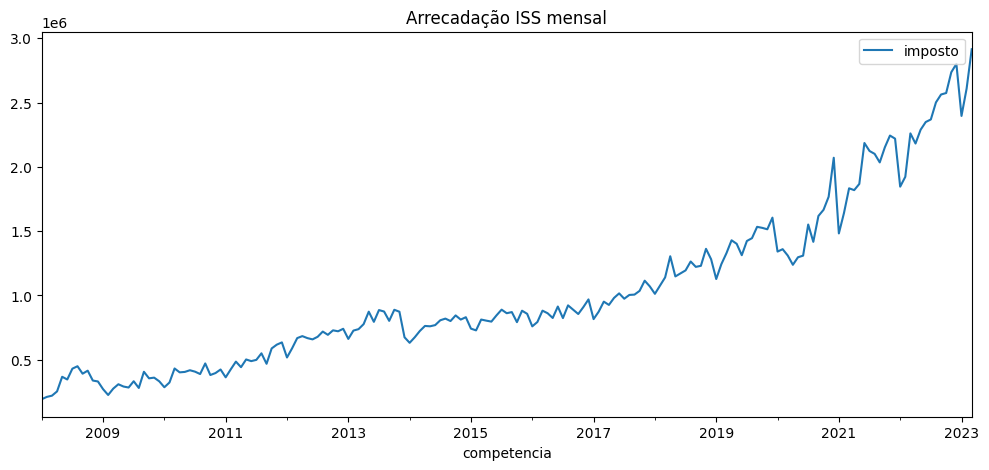

In [25]:
#verificar o ISS total por mes
df_iss = df_servicos_prestados.drop(columns=['id_empresa']).groupby(['competencia']).sum(['imposto'])
print(df_iss)
df_iss['imposto'].plot(figsize=(12,5), title ='Arrecadação ISS mensal', legend=True)

          imposto
ano              
2008   3951572.93
2009   3729793.38
2010   4739104.77
2011   6068899.48
2012   8070348.53
2013   9575289.57
2014   9241033.20
2015   9884150.32
2016  10408005.38
2017  11773546.87
2018  14411216.89
2019  16892966.19
2020  17948818.92
2021  23703978.25
2022  28392483.74
2023   7919747.98


<AxesSubplot: title={'center': 'Arrecadação ISS anual'}, xlabel='ano'>

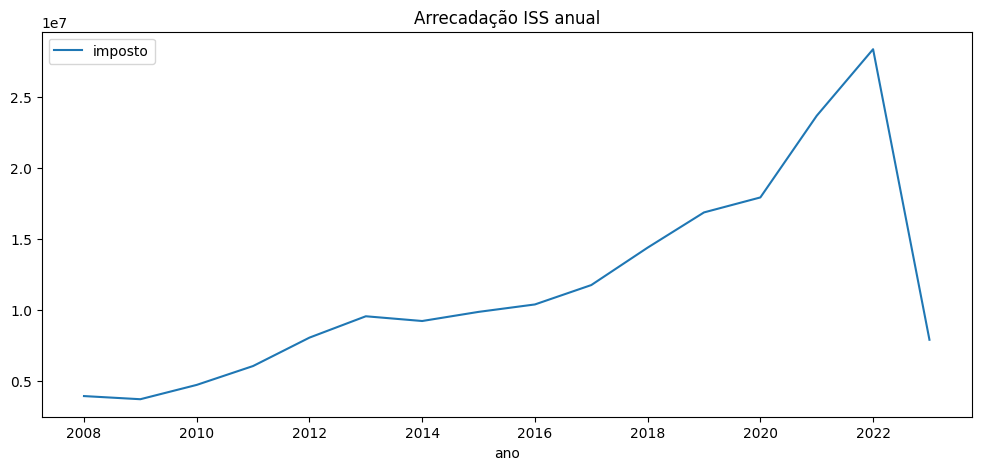

In [31]:
#iss anual
df_iss = df_servicos_prestados.copy()
#criando coluna de ano
df_iss['ano'] = df_iss['competencia'].dt.year
df_iss = df_iss.drop(columns=['competencia'])
#agrupando imposto por ano
df_iss = df_iss.drop(columns=['id_empresa']).groupby(['ano']).sum(['imposto'])
print(df_iss)
df_iss['imposto'].plot(figsize=(12,5), title ='Arrecadação ISS anual', legend=True)

In [36]:
df_impresas = pd.read_csv('../Datasets/dados_empresa_anonimizado.csv', sep=';')
df_impresas

,id_empresa,data_inicio_atividade,data_cadastro,nome_economico,nome_bairro,latitude,longitude
0,5801,2021-05-28,2021-07-26,Empresa 5801,Bairro 1,-27.216891,-49.644841
1,6086,2022-05-16,2022-05-18,Empresa 6086,Bairro 1,-27.216891,-49.644841
2,590,2012-10-02,2012-11-01,Empresa 590,Bairro 1,-27.216891,-49.644841
3,543,2012-08-01,2012-08-30,Empresa 543,Bairro 1,-27.216891,-49.644841
4,538,2012-06-18,2012-08-23,Empresa 538,Bairro 1,-27.216891,-49.644841
...,...,...,...,...,...,...,...
6363,3362,2014-05-15,2014-05-29,Empresa 3362,Bairro 22954,NaN,NaN
6364,5769,2021-03-19,2021-07-08,Empresa 5769,Bairro 23419,NaN,NaN
6365,2936,2010-08-05,2010-08-25,Empresa 2936,NaN,NaN,NaN
6366,5720,2017-12-21,2017-12-21,Empresa 5720,NaN,NaN,NaN


In [38]:
df_impresas = df_impresas.dropna()
df_impresas

,id_empresa,data_inicio_atividade,data_cadastro,nome_economico,nome_bairro,latitude,longitude
0,5801,2021-05-28,2021-07-26,Empresa 5801,Bairro 1,-27.216891,-49.644841
1,6086,2022-05-16,2022-05-18,Empresa 6086,Bairro 1,-27.216891,-49.644841
2,590,2012-10-02,2012-11-01,Empresa 590,Bairro 1,-27.216891,-49.644841
3,543,2012-08-01,2012-08-30,Empresa 543,Bairro 1,-27.216891,-49.644841
4,538,2012-06-18,2012-08-23,Empresa 538,Bairro 1,-27.216891,-49.644841
...,...,...,...,...,...,...,...
6354,4674,2018-06-22,2018-07-02,Empresa 4674,Bairro 25,-27.186184,-49.600984
6355,5912,2021-08-30,2021-10-29,Empresa 5912,Bairro 25,-27.186184,-49.600984
6356,4628,2018-04-11,2018-05-25,Empresa 4628,Bairro 25,-27.186184,-49.600984
6357,4064,2016-06-16,2016-12-01,Empresa 4064,Bairro 25,-27.186184,-49.600984


In [39]:
dados_basicos_empresa = df_impresas.drop(columns=['data_inicio_atividade', 'data_cadastro', 'nome_economico', 'latitude', 'longitude'])
dados_basicos_empresa

,id_empresa,nome_bairro
0,5801,Bairro 1
1,6086,Bairro 1
2,590,Bairro 1
3,543,Bairro 1
4,538,Bairro 1
...,...,...
6354,4674,Bairro 25
6355,5912,Bairro 25
6356,4628,Bairro 25
6357,4064,Bairro 25


In [41]:
df_servicos_prestados

,id_empresa,competencia,imposto
0,1,2010-03-01,79.00
1,1,2010-04-01,98.84
2,1,2010-05-01,85.60
3,1,2010-06-01,99.20
4,1,2010-07-01,101.40
...,...,...,...
243087,6351,2023-03-01,6.40
243088,6353,2023-03-01,36.00
243089,6354,2023-03-01,397.04
243090,6356,2023-03-01,231.15


In [43]:
df_servico_empresa = pd.merge(df_servicos_prestados, dados_basicos_empresa, on='id_empresa')
df_servico_empresa

,id_empresa,competencia,imposto,nome_bairro
0,1,2010-03-01,79.00,Bairro 1
1,1,2010-04-01,98.84,Bairro 1
2,1,2010-05-01,85.60,Bairro 1
3,1,2010-06-01,99.20,Bairro 1
4,1,2010-07-01,101.40,Bairro 1
...,...,...,...,...
240696,6351,2023-03-01,6.40,Bairro 22
240697,6353,2023-03-01,36.00,Bairro 22
240698,6354,2023-03-01,397.04,Bairro 10
240699,6356,2023-03-01,231.15,Bairro 3


In [57]:
#criando dataset de iss por bairro
df_iss_bairro = df_servico_empresa.drop(columns=['id_empresa']).groupby(['competencia', 'nome_bairro']).sum(['imposto'])
df_iss_bairro = df_iss_bairro.reset_index()
df_iss_bairro

,competencia,nome_bairro,imposto
0,2008-01-01,Bairro 1,50096.66
1,2008-01-01,Bairro 10,3071.59
2,2008-01-01,Bairro 11,970.33
3,2008-01-01,Bairro 12,31937.81
4,2008-01-01,Bairro 13,18303.70
...,...,...,...
4570,2023-03-01,Bairro 5,61103.52
4571,2023-03-01,Bairro 6,84123.30
4572,2023-03-01,Bairro 7,139395.33
4573,2023-03-01,Bairro 8,75837.57


In [59]:
import numpy as np
import matplotlib.pyplot as plt

,nome_bairro,imposto
2,Bairro 11,437111.26
15,Bairro 23,683360.37
13,Bairro 21,715333.13
8,Bairro 17,862619.24
19,Bairro 4,1078795.06
24,Bairro 9,1407256.53
10,Bairro 19,1607072.36
9,Bairro 18,1773933.09
12,Bairro 20,2468038.83
20,Bairro 5,2682577.20


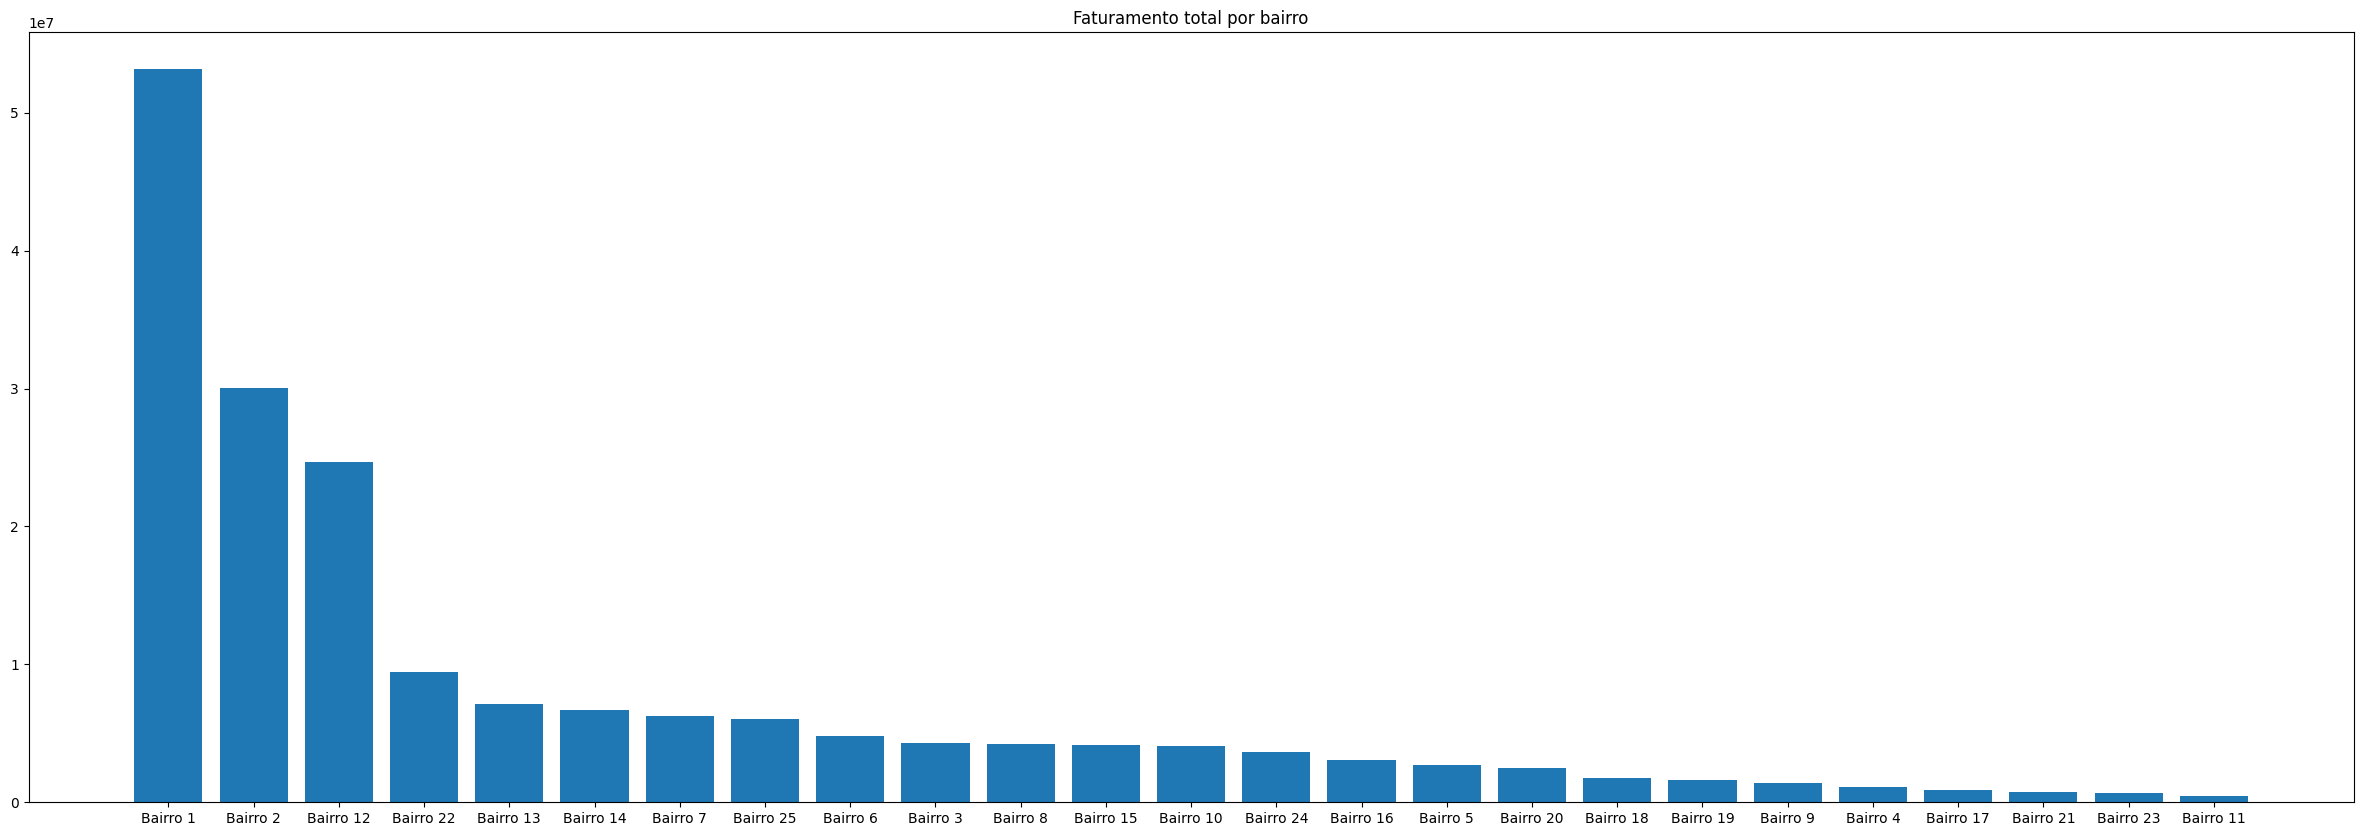

In [97]:
total_bairro = df_iss_bairro.drop(columns=['competencia']).groupby(['nome_bairro']).sum(['imposto'])
total_bairro = total_bairro.reset_index()
total_bairro= total_bairro.sort_values(by=['imposto'],ascending=False)

nome_barras = total_bairro['nome_bairro'].values
tamanho_barras = total_bairro['imposto'].values
y_pos = np.arange(len(nome_barras))


plt.figure(figsize=(30,10))
# Create bars
plt.bar(y_pos, tamanho_barras)

# Create names on the x-axis
plt.xticks(y_pos, nome_barras)
plt.title('Faturamento total por bairro')
# Show graphic
plt.show()


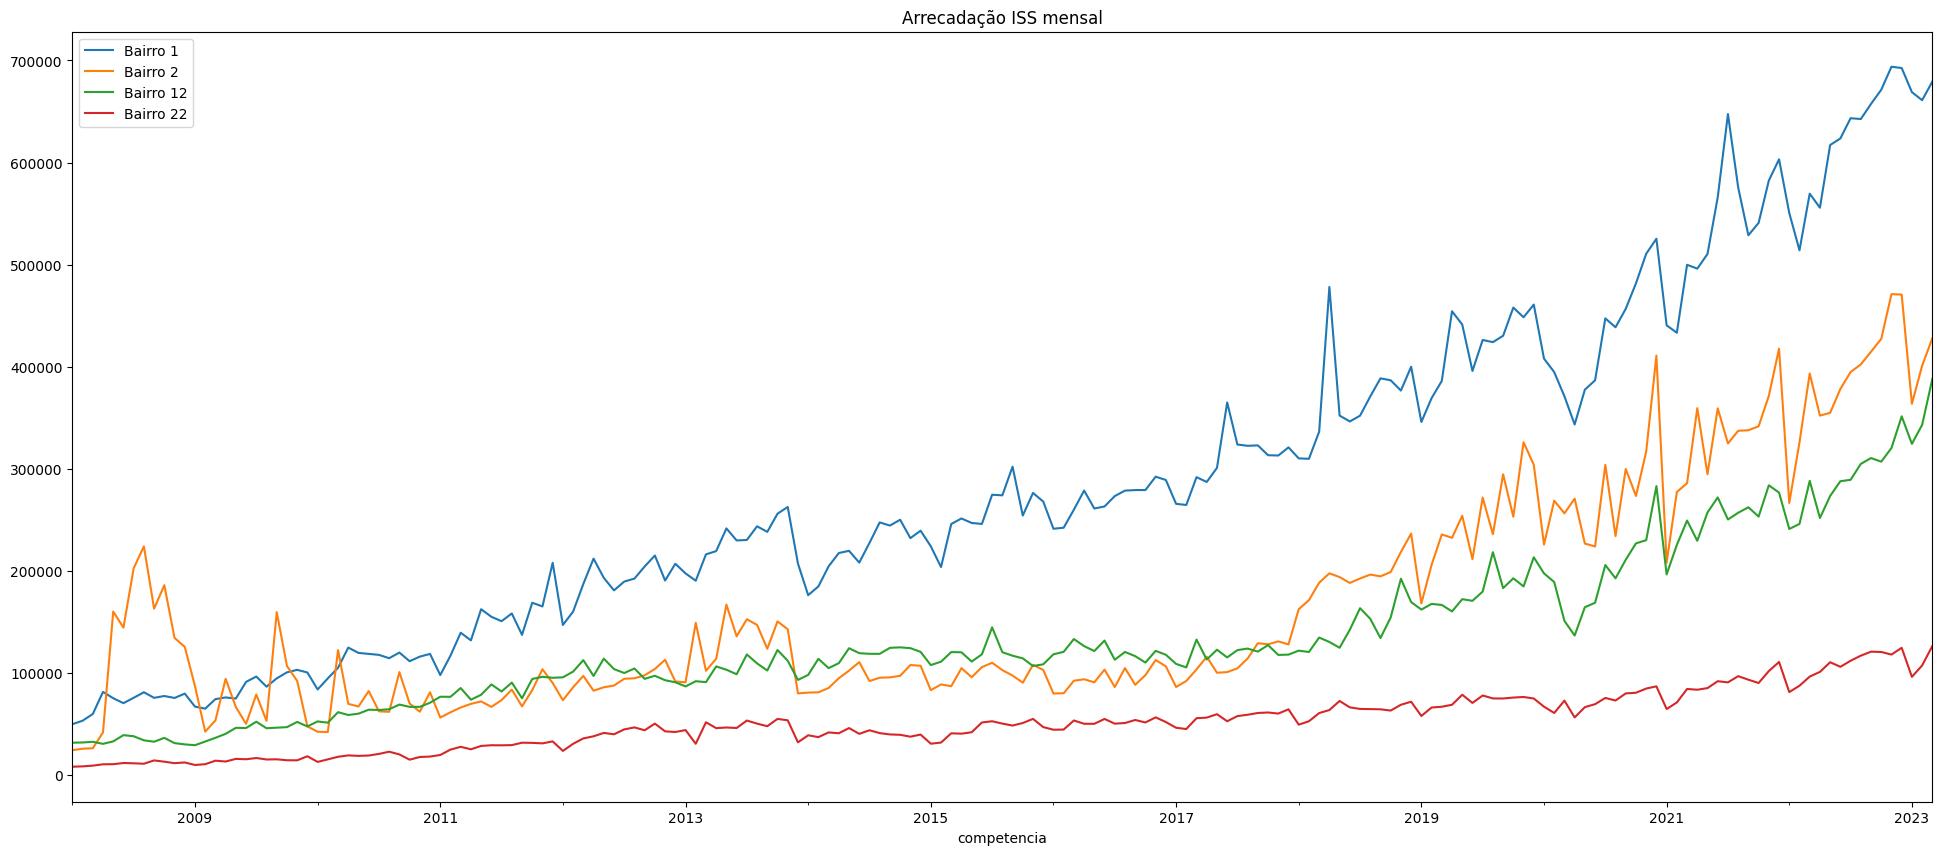

In [95]:
df_iss_bairro = df_servico_empresa.drop(columns=['id_empresa']).groupby(['competencia', 'nome_bairro']).sum(['imposto'])
df_iss_bairro = df_iss_bairro.reset_index()

bairros_maior_faturamento = ['Bairro 1','Bairro 2','Bairro 12', 'Bairro 22']

for bairro in bairros_maior_faturamento:
    df_dados_bairro = df_iss_bairro[df_iss_bairro['nome_bairro'] == bairro]
    df_dados_bairro = df_dados_bairro.drop(columns=['nome_bairro']).groupby(['competencia']).sum(['imposto'])
    df_dados_bairro = df_dados_bairro.rename(columns={'imposto':bairro})
    df_dados_bairro[bairro].plot(figsize=(24,10), title ='Arrecadação ISS mensal', legend=True)
